# Hotel Booking Demand

### Andri Rifky,JCDS 1804 Jakarta



## Business Problem Understanding

**Context**  
Sebuah hotel ingin menyiapkan kamar untuk calon pelanggannya. dari catatan yang ada, hotel ingin mengetahui pelanggan mana yang akan benar - benar menginap dan mana yang tidak.


Target :

0 : Tidak membatalkan booking

1 : Membatalkan Booking

**Problem Statement :**

Proses penyiapan fasilitas seperti kamar pada hotel memakan waktu dan sumber daya. Jika hotel menyiapkan semua fasilitas tetapi tidak digunakan maka akan sia - sia dan hotel dapat merugi.Sedangkan beberapa fasilitas hotel kualitasnya akan menurun tiap waktu (contoh: makanan pada restaurant), sehingga fasilitas harus disiapkan disaat diminta.

**Goals :**

Maka berdasarkan permasalahan tersebut, hotel ingin memiliki kemampuan untuk memprediksi faktor - faktor apa saja yang membuat pelanggan membatalkan booking, sehingga dapat memfokuskan penyiapan fasilitas pada pelanggan yang akan menginap dihotel tersebut. 

Dan juga, jika hotel memiliki pelanngan dalam waiting list , mereka dapat memprioritaskan pelanggan yang tidak dalam kriteria pelanggan yang mebatalkan booking.


**Analytic Approach :**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan pengunjung yang jadi menginap di hotel dan yang tidak jadi(batal).

Kemudian kita akan membangun model klasifikasi yang akan membantu hotel untuk dapat memprediksi karakteristik engunjung yang akan menginap atau tidak.

![title](picture.jpg)

Type 1 error : False Positive  
Konsekuensi: Kehilangan pengunjung, menurunkan reputasi hotel

Type 2 error : False Negative  
Konsekuensi: Sia-sia sumber daya untuk persiapan fasilitas

## Data Understanding

Note : 
- Dataset tidak seimbang
- Sebagian besar fitur bersifat kategori (Nominal, Binary)
- Setiap baris data merepresentasikan informasi pelanggan yang memesan(booking) dimasa lalu

### Attribute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| country | str | Negara Asal Pelanggan |
| market_segment | str | Segmen Pasar |
| previous_cancellations | int64 | Berapa kali melakukan pembatalan pemesanan |
| booking_changes | int64 | Berapa kali melakukan prubahan pemesanan |
| daposit_type | str | Tipe deposit |
| days_in_waiting_list | int64 | hari menunggu dalam waiting list |
| customer_type | str | Tipe pemesanan |
| reserved_room_type | str | Tipe kamar yang disewa |
| required_car_parking_space | int64 | Jumlah perminataan lahan parkir |
| total_of_special_request | int64 | Permintaan Tambahan |
| is_canceled(target) | int64 | Pembatalan pemesanan,0 – Tidak batal, 1 – Batal |

In [1]:
# Libary
import pandas as pd
import numpy as np

import seaborn as snis
import matplotlib.pyplot as mpl

In [2]:
df=pd.read_csv('data_hotel_booking_demand.csv')
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


In [5]:
df.dtypes

country                        object
market_segment                 object
previous_cancellations          int64
booking_changes                 int64
deposit_type                   object
days_in_waiting_list            int64
customer_type                  object
reserved_room_type             object
required_car_parking_spaces     int64
total_of_special_requests       int64
is_canceled                     int64
dtype: object

cek unique

In [3]:
df['country'].unique()

array(['IRL', 'FRA', 'PRT', 'NLD', 'ESP', 'UMI', 'CN', 'LUX', 'BRA',
       'BEL', 'JPN', 'DEU', 'ITA', 'CHE', 'GBR', 'AGO', 'SRB', 'COL',
       'CHN', 'SWE', 'AUT', 'CIV', 'CZE', 'POL', 'USA', 'SGP', 'RUS',
       'ROU', 'DNK', 'IND', 'MAR', 'PHL', 'ARG', 'ISL', 'ZAF', 'LBN',
       'MOZ', 'TUR', 'BGD', 'MEX', 'CAF', 'NOR', 'FIN', 'UKR', 'EGY',
       'ISR', nan, 'KOR', 'AZE', 'HUN', 'AUS', 'EST', 'CHL', 'SVN', 'PRY',
       'ABW', 'ALB', 'LTU', 'ARE', 'HRV', 'SAU', 'NZL', 'LVA', 'ATA',
       'KAZ', 'DZA', 'TWN', 'CRI', 'BIH', 'BGR', 'IRQ', 'OMN', 'VEN',
       'IDN', 'GEO', 'MLT', 'IRN', 'BLR', 'URY', 'LBY', 'TUN', 'BEN',
       'MYS', 'MWI', 'GRC', 'CYP', 'CPV', 'HKG', 'PRI', 'MKD', 'MUS',
       'IMN', 'PAN', 'NGA', 'GLP', 'KHM', 'PER', 'QAT', 'SEN', 'MAC',
       'SVK', 'BHR', 'ECU', 'SYC', 'BOL', 'TJK', 'LCA', 'MDV', 'SYR',
       'ZMB', 'LIE', 'THA', 'MNE', 'BRB', 'CMR', 'JEY', 'GTM', 'LKA',
       'JOR', 'TZA', 'AND', 'ARM', 'GIB', 'VNM', 'PAK', 'JAM', 'DOM',
       'KWT', 'L

In [4]:
df['reserved_room_type'].unique()

array(['A', 'E', 'D', 'F', 'B', 'G', 'C', 'H', 'L', 'P'], dtype=object)

In [5]:
df['customer_type'].unique()

array(['Transient-Party', 'Transient', 'Contract', 'Group'], dtype=object)

In [6]:
df['is_canceled'].unique()

array([0, 1], dtype=int64)

In [7]:
# cek null
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,country,object,351,0.42,162,"[NLD, DMA]"
1,market_segment,object,0,0.00,8,"[Direct, Aviation]"
2,previous_cancellations,int64,0,0.00,15,"[19, 25]"
3,booking_changes,int64,0,0.00,19,"[7, 17]"
4,deposit_type,object,0,0.00,3,"[No Deposit, Non Refund]"
5,days_in_waiting_list,int64,0,0.00,115,"[122, 64]"
6,customer_type,object,0,0.00,4,"[Transient, Contract]"
7,reserved_room_type,object,0,0.00,10,"[B, C]"
8,required_car_parking_spaces,int64,0,0.00,5,"[0, 3]"
9,total_of_special_requests,int64,0,0.00,6,"[4, 1]"


In [8]:
# summary
df.describe()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


Di bawah akan memplot Heatmap yang menunjukkan korelasi antar kolom.

Korelasi  berkisar dari -1 hingga 1.

- -1 - Korelasi Negatif yang menyatakan bahwa jika nilai satu variabel ada maka nilai variabel lain pasti tidak ada.
- 0 - Tidak ada korelasi yang menyatakan bahwa nilai variabel yang ada atau tidak ada tidak berpengaruh satu sama lain.
- 1 - Korelasi Positif yang menyatakan bahwa jika nilai satu variabel ada maka nilai yang lain pasti ada

In [ ]:
# Corelation matrix
df.corr()

,ever cancel,book change,deposit,waiting list,required car parking spaces,total of special requests,is canceled
ever cancel,1.000000,-0.072823,0.319302,0.122438,-0.043377,-0.110647,0.270661
book change,-0.072823,1.000000,-0.141332,-0.016908,0.077203,0.051107,-0.186521
deposit,0.319302,-0.141332,1.000000,0.234120,-0.093909,-0.268128,0.477539
waiting list,0.122438,-0.016908,0.234120,1.000000,-0.041384,-0.113927,0.101592
required car parking spaces,-0.043377,0.077203,-0.093909,-0.041384,1.000000,0.083678,-0.194807
total of special requests,-0.110647,0.051107,-0.268128,-0.113927,0.083678,1.000000,-0.235993
is canceled,0.270661,-0.186521,0.477539,0.101592,-0.194807,-0.235993,1.000000


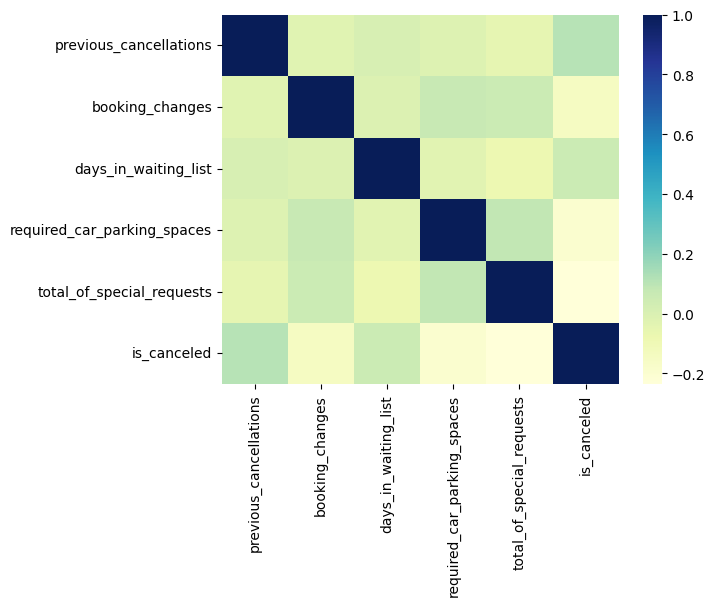

In [9]:
# heatmap corelation matrix
snis.heatmap(df.corr(),cmap='YlGnBu')
mpl.show()

In [6]:
# Checking imbalance pada terget
(df['is_canceled'].value_counts()/len(df))*100


0    63.172316
1    36.827684
Name: is_canceled, dtype: float64

dari pengecekan, data tidak imbalance dan tidak dibalancing karena menurut domain knowledge tidak perlu.

# Data cleaning

In [10]:
# Format Kolom agar sedikit rapih
df.columns = [s.strip().replace('_',' ') for s in df.columns]

In [14]:
# cek missing value
df.isna().sum()

country                        351
market segment                   0
previous cancellations           0
booking changes                  0
deposit type                     0
days in waiting list             0
customer type                    0
reserved room type               0
required car parking spaces      0
total of special requests        0
is canceled                      0
dtype: int64

In [15]:
df['country'].isna().sum()/len(df)*100
# jumlah nan hanya sekita 0,4% dari keseluruhan data

0.4199921027125986

terdapat missing value sebanyak 351 pada kolom country. karena tidak bisa melakukan dari kolom lain, maka akan di drop
karena jumlah data dibawah 1% maka di drop saja.

In [16]:
df=df.dropna()

In [17]:
df.isna().sum()

country                        0
market segment                 0
previous cancellations         0
booking changes                0
deposit type                   0
days in waiting list           0
customer type                  0
reserved room type             0
required car parking spaces    0
total of special requests      0
is canceled                    0
dtype: int64

In [18]:
df

,country,market segment,previous cancellations,booking changes,deposit type,days in waiting list,customer type,reserved room type,required car parking spaces,total of special requests,is canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


## Data Preprocessing

beberapa kolom akan di binning
seperti:
1. previous cancellations:  0: tidak pernah membatalkan pesanan
                            1: pernah membatalkan
1. booking changes: 0: tidak pernah merubah pesanan
                    1: pernah merubah pesanan
1. deposit type 0: tidak membayar uang muka(deposit)
                1: membayar uang muka (deposit)
1. days in waiting list:    0: tidak dalam waiting list
                            1: dalam waiting list

In [11]:
# binning
df['previous cancellations'] = df['previous cancellations'].apply(lambda x: 0 if x == 0 else 1)
df['booking changes'] = df['booking changes'].apply(lambda x: 0 if x == 0 else 1)
df['deposit type'] = df['deposit type'].apply(lambda x: 0 if x == 'No Deposit' else 1)
df['days in waiting list'] = df['days in waiting list'].apply(lambda x: 0 if x == 0 else 1)

Setelah nilainya diubah, beberapa kolom kita ubah namanya agar lebih mudah dalam proses kedepannya

1. deposit type -> deposit
1. previous cancellations -> ever cancel
1. booking changes -> book change
1. days in waiting list -> waiting list

In [12]:
# Merubah beberapa nama kolom
df.rename(columns={'deposit type': 'deposit','previous cancellations':'ever cancel','booking changes':'book change','days in waiting list':'waiting list'},inplace=True)

In [23]:
df

,country,market segment,ever cancel,book change,deposit,waiting list,customer type,reserved room type,required car parking spaces,total of special requests,is canceled
0,IRL,Offline TA/TO,0,0,0,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,0,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,0,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,0,0,Transient,A,0,1,1
4,PRT,Online TA,0,1,0,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,0,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,0,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,0,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,0,0,Transient-Party,A,0,0,0


Selanjuta melakukan fitur encoding untuk fitur2 categorical.
Yang akan kita lakukan adalah :

1. Merubah fitur/kolom `country` menggunakan Binary Encoding, karena fitur ini memiliki unique data yang banyak dan tidak memiliki urutan/tidak ordinal, bila kita menggunakan One Hot Encoding akan terlalu banyak fitur baru yg terbuat, dan kalau kita menggunakan Ordinal/Label Encoding hasilnya dapat kurang cocok/kurang baik. Oleh karena itu kita akan mencoba menggunakan Binary Encoding saja.
1. Merubah fitur/kolom `customer type` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
1. Merubah fitur/kolom `reserved room type` menggunakan Binary Encoding, Sebenarnya bisa menggunakan One Hot Encoding.Tetapi saat menggunakan One Hot Hasil Evaluasi Tidak keluar(berisi NaN).
1. Merubah fitur/kolom `market segment` menggunakan Binary Encoding, Sebenarnya bisa menggunakan One Hot Encoding.Tetapi saat menggunakan One Hot Hasil Evaluasi Tidak keluar(berisi NaN).

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


In [25]:
#encoding
transformer=ColumnTransformer([
    ('onehot',OneHotEncoder(drop='first'),['customer type']),
    ('binary',ce.BinaryEncoder(),['country','reserved room type','market segment'])
],remainder='passthrough')

In [26]:
x=df.drop(columns='is canceled')
y=df['is canceled']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=2020)

In [28]:
transformer.fit_transform(x)

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 2.],
       [0., 1., 0., ..., 0., 0., 2.],
       ...,
       [0., 1., 0., ..., 0., 0., 3.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

## EDA

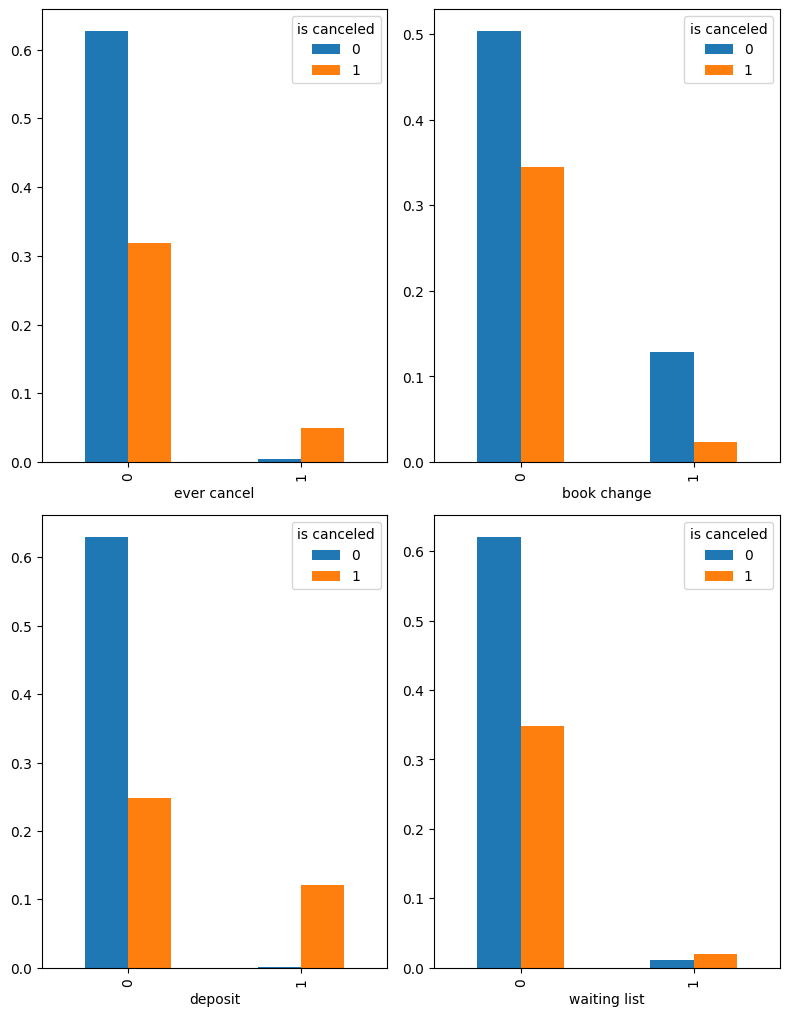

In [64]:
#visualisasi EDA

count=0
fig=mpl.figure(figsize=(8,20))
fitur_kategorik=df[['ever cancel','book change','deposit','waiting list']]
for fitur in fitur_kategorik:
    count +=1
    ax=mpl.subplot(4,2,count)
    pd.crosstab(df[fitur],df['is canceled'],normalize=True).plot(kind='bar',ax=ax)
    fig.tight_layout()

mpl.show()

dari beberapa kolom pada EDA dapat disimpulkan bahwa:
1. Pelanggan yang pernah melakukan pembatalan cenderung melakukan pembatalan lagi
1. pelanggan yang melakukan perubahan pesanan cenderung tidak membatalkan pesanan
1. pelanggan yang melakukan deposit, atau pembayaran di awal. cenderung melakukan pembatalan
1. pelanggan dalam waiting list lebih banyak melakukan pembatalan

setelah melakukan EDA selanjutnya akan dicoba dengan metode machine learning

## Modelling & Evaluation

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [29]:
logreg=LogisticRegression()
tree=DecisionTreeClassifier()
knn=KNeighborsClassifier()
forest=RandomForestClassifier()
ada=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
xgb=XGBClassifier()

# Model selection

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [30]:
models=[logreg,tree,knn,forest,ada,gbc,xgb]
score=[]
rata=[]
std=[]
for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocessing',transformer),
        ('model',i)
    ])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='f1')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

d:\Dev\Python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Dev\Python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_re

In [31]:
pd.DataFrame({'models':models,'score':score,'rata rata':rata,'standar deviasi':std})

,models,score,rata rata,standar deviasi
0,LogisticRegression(),"[0.6560100692259283, 0.65153404839112, 0.65253...",0.654626,0.005501
1,DecisionTreeClassifier(),"[0.7201199815413013, 0.7116182572614107, 0.719...",0.719591,0.006345
2,KNeighborsClassifier(),"[0.6795235394214408, 0.6695621551825331, 0.668...",0.670608,0.006457
3,RandomForestClassifier(),"[0.7230468300540789, 0.7137580794090489, 0.721...",0.723982,0.006673
4,AdaBoostClassifier(),"[0.6599477416946622, 0.6574097450138855, 0.657...",0.661160,0.006052
5,GradientBoostingClassifier(),"[0.6779187817258884, 0.703914590747331, 0.6966...",0.697094,0.012735
6,"XGBClassifier(base_score=None, booster=None, c...","[0.7206487248795391, 0.7153250410701714, 0.726...",0.724070,0.006101


In [32]:
pd.DataFrame({
    'model':['logreg','tree','knn','forest','ada','gbc','xgb'],
    'mean':rata,
    'std':std
})

,model,mean,std
0,logreg,0.654626,0.005501
1,tree,0.719591,0.006345
2,knn,0.670608,0.006457
3,forest,0.723982,0.006673
4,ada,0.661160,0.006052
5,gbc,0.697094,0.012735
6,xgb,0.724070,0.006101


dari hasil CV, mean tertinggi adalah xgboost, sedangkan std terendah adalah logreg. karena mayoritas std 0.01, maka akan dipilih dengan mean tertinggi yaitu Xgbost

xg boost adalah salah satu algoritma yang paling populer dan paling banyak digunakan karena algoritma ini termasuk algoritma yang powerful. algoritma ini mirip dengan gradient boost hanya saja menggunakan beberapa proses tambahan seperti pemangkasan, newton boosting, dan parameter pengacakan ekstra. Proses pemangkasan atau penyusutan proporsional simpul daun digunakan untuk meningkatkan generalisasi model. proses newton boosting adalah proses untuk menyediakan rute langsung sehingga tidak memerlukan penurunan gradient. Proses pengacakan parameter bertujuan untuk mengurangi korelasi antar tree sehingga dapat meningkatkan kekuatan algoritma ensemble. 

# Model test

In [35]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [33]:
model={
    'xgb': XGBClassifier(random_state=2020),
}

xgb
              precision    recall  f1-score   support

           0       0.83      0.89      0.86     13199
           1       0.78      0.68      0.73      7695

    accuracy                           0.81     20894
   macro avg       0.80      0.78      0.79     20894
weighted avg       0.81      0.81      0.81     20894



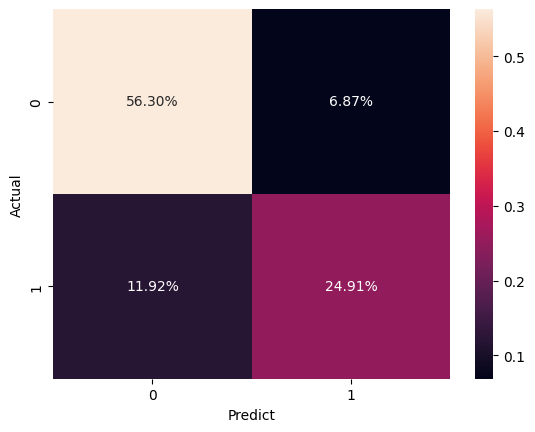

In [36]:
for i,j in model.items():
    estimator=Pipeline([
    ('preprocessing',transformer),
    ('model',j)
    ])
    estimator.fit(x_train,y_train)
    y_pred=estimator.predict(x_test)
    print(i)
    print(classification_report(y_test,y_pred))
    snis.heatmap(confusion_matrix(y_test,y_pred)/np.sum(confusion_matrix(y_test,y_pred)),annot=True,fmt='.2%')
    mpl.xlabel('Predict')
    mpl.ylabel('Actual')
    mpl.show()



In [37]:
tunning_models=[xgb]
for model in tunning_models: 
    estimator=Pipeline([
        ('processing',transformer),
        ('model',model)
])

In [46]:
hyperparam=[
    {'model':[xgb],
    'model__learning_rate':[0.1],
    'model__n_estimators':[200],
    'model__max_depth':[1,2,3,4,5]},
    {'model':[xgb],
    'model__learning_rate':[0.01],
    'model__n_estimators':[500],
    'model__max_depth':[1,2,3,4,5]},
    {'model':[xgb],
    'model__learning_rate':[0.001],
    'model__n_estimators':[1000],
    'model__max_depth':[1,2,3,4,5]},

]

In [47]:
skfold=StratifiedKFold(n_splits=5)
grid=GridSearchCV(estimator,
                 param_grid=hyperparam,
                 cv=skfold,
                 scoring='f1',
           n_jobs=-1)

In [48]:
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['customer '
                                                                          'type']),
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                         ['country',
                                                                          'reserved '
                                                                          'room '
                                                                          'type',
                                                                          'market '
                                                                          'segment'])])),
                                       ('model',
                                        AdaBoostClassifier(learning_...
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=5, max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  n_estimators=200, n_jobs=None,
                                                  num_parallel_tree=None,
                                                  predictor=None,
                                                  random_state=None, ...)],
                          'model__learning_rate': [0.001],
                          'model__max_depth': [1, 2, 3, 4, 5],
                          'model__n_estimators': [1000]}],
             scoring='f1')

In [49]:
print('best score',grid.best_score_)
print ('best param', grid.best_params_)

best score 0.7240976425984763
best param {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}


In [51]:
pd.set_option ('display.max_rows', None)
pd.DataFrame(grid.cv_results_).sort_values('rank_test_score')[['mean_fit_time', 'params','mean_test_score','std_test_score','rank_test_score']]

,mean_fit_time,params,mean_test_score,std_test_score,rank_test_score
4,11.989467,"{'model': XGBClassifier(base_score=None, boost...",0.724098,0.004723,1
3,9.810561,"{'model': XGBClassifier(base_score=None, boost...",0.716871,0.006941,2
2,7.623480,"{'model': XGBClassifier(base_score=None, boost...",0.712445,0.006762,3
9,29.620051,"{'model': XGBClassifier(base_score=None, boost...",0.689332,0.005331,4
1,5.690770,"{'model': XGBClassifier(base_score=None, boost...",0.677358,0.012777,5
8,23.745516,"{'model': XGBClassifier(base_score=None, boost...",0.673077,0.009843,6
7,18.227785,"{'model': XGBClassifier(base_score=None, boost...",0.650696,0.013979,7
0,3.896986,"{'model': XGBClassifier(base_score=None, boost...",0.609663,0.016872,8
14,48.668993,"{'model': XGBClassifier(base_score=None, boost...",0.545008,0.007378,9
6,13.015433,"{'model': XGBClassifier(base_score=None, boost...",0.544051,0.009271,10


## Before vs After Tuning

In [52]:
# Before tuning
xgb=XGBClassifier(random_state=2020)
estimator=Pipeline([
    ('processing',transformer),
    ('model',xgb)
])
estimator.fit(x_train,y_train)
y_pred_before=estimator.predict(x_test)

# After tuning
best_model=grid.best_estimator_
best_model.fit(x_train,y_train)
y_pred_after=best_model.predict(x_test)

In [53]:
before_tuning=classification_report(y_test,y_pred_before)
after_tuning=classification_report(y_test,y_pred_after)

In [54]:
print(f'Before Tuning \n',before_tuning)
print(f'After Tuning \n',after_tuning)

Before Tuning 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86     13199
           1       0.78      0.68      0.73      7695

    accuracy                           0.81     20894
   macro avg       0.80      0.78      0.79     20894
weighted avg       0.81      0.81      0.81     20894

After Tuning 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86     13199
           1       0.77      0.69      0.73      7695

    accuracy                           0.81     20894
   macro avg       0.80      0.79      0.79     20894
weighted avg       0.81      0.81      0.81     20894



terlihat bahwa nilai mean sebelum dan setelah tuning meningkat 0.000028, karena pembulatan. maka nilai pada f1 nya tidak berubah

## Feature Importances


In [55]:
best_model

Pipeline(steps=[('processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['customer type']),
                                                 ('binary', BinaryEncoder(),
                                                  ['country',
                                                   'reserved room type',
                                                   'market segment'])])),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, ear...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.1,
                               max_bin=256, max_cat_threshold=64,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=5, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=200, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, ...))])

In [56]:
# feature
best_model[0].transformers_[0][1].get_feature_names_out()

array(['customer type_Group', 'customer type_Transient',
       'customer type_Transient-Party'], dtype=object)

In [57]:
best_model[0].transformers_[1][1].get_feature_names()

['country_0',
 'country_1',
 'country_2',
 'country_3',
 'country_4',
 'country_5',
 'country_6',
 'country_7',
 'reserved room type_0',
 'reserved room type_1',
 'reserved room type_2',
 'reserved room type_3',
 'market segment_0',
 'market segment_1',
 'market segment_2',
 'market segment_3']

In [58]:
x.columns[best_model[0].transformers_[2][2]]

Index(['ever cancel', 'book change', 'deposit', 'waiting list',
       'required car parking spaces', 'total of special requests'],
      dtype='object')

In [59]:
feature=list(best_model[0].transformers_[0][1].get_feature_names_out())+list(best_model[0].transformers_[1][1].get_feature_names())+list(x.columns[best_model[0].transformers_[2][2]])

In [60]:
#feature importance
pd.DataFrame({'imp':best_model[1].feature_importances_},index=feature).sort_values('imp',ascending=False).head()

,imp
deposit,0.677255
required car parking spaces,0.089883
ever cancel,0.033572
customer type_Transient,0.031331
market segment_1,0.023030


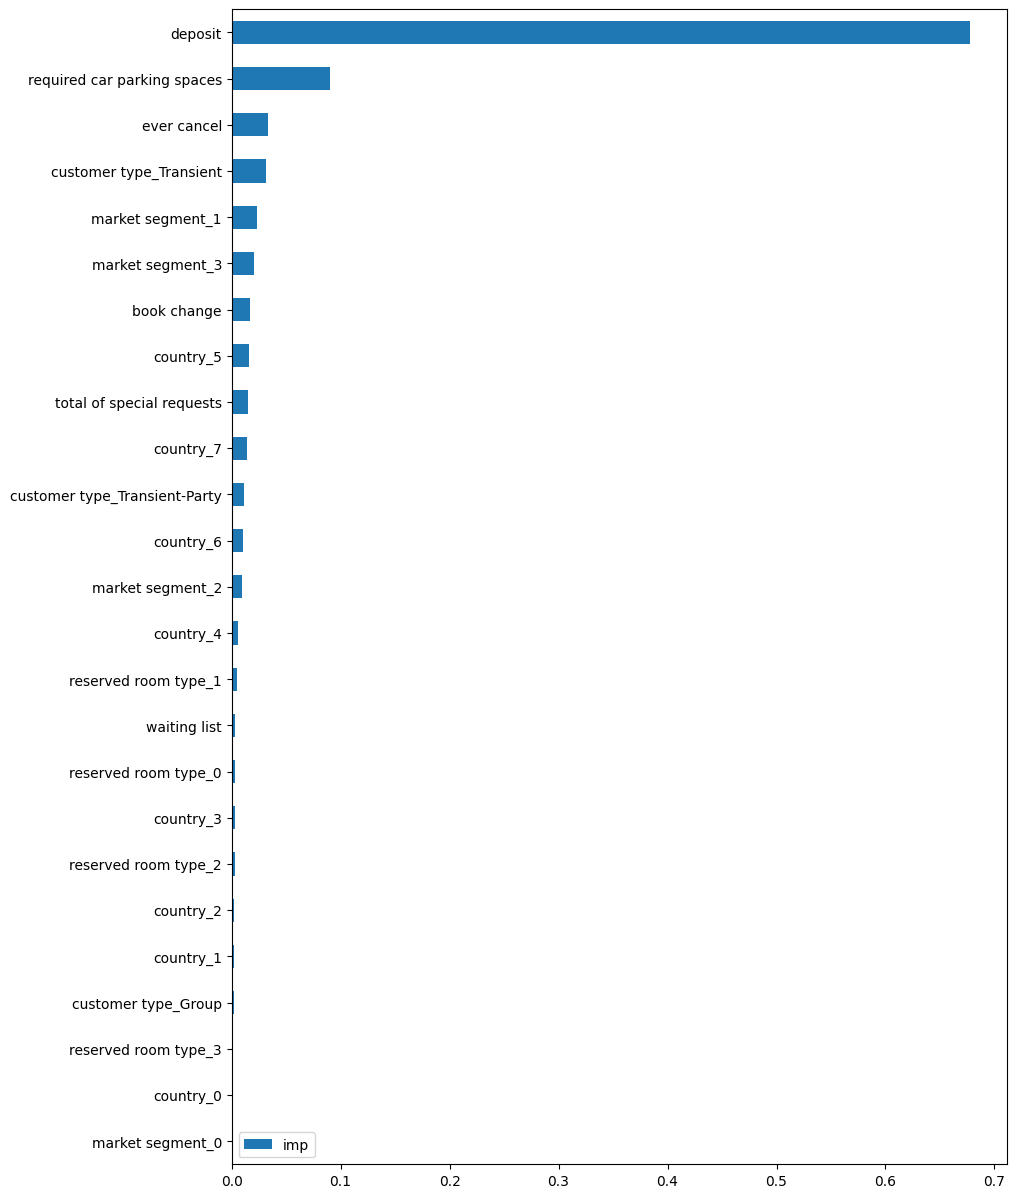

In [61]:
#visualisasi
pd.DataFrame({'imp':best_model[1].feature_importances_},index=feature).sort_values('imp',ascending=True).plot(kind='barh',figsize=(10,15))
mpl.show()

Terlihat bahwa ternyata untuk model XGV, fitur/kolom deposit adalah yang paling penting, kemudian diikuti dengan required parking space, ever cancel, dan selanjutnya.

ini mirip dengan simple EDA diatas dimana pelanggan yang melakukan deposit cenderung membatalkan pemesanan

## Conclusion & Recommendation

In [66]:
print(f'Classification report after tuning \n',after_tuning)

Classification report after tuning 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86     13199
           1       0.77      0.69      0.73      7695

    accuracy                           0.81     20894
   macro avg       0.80      0.79      0.79     20894
weighted avg       0.81      0.81      0.81     20894



In [67]:
# Save Model
import pickle

In [69]:
pickle.dump(best_model,open('model_picle.sav','wb'))

Berdasarkan hasil classification report dari model kita, kita dapat menyimpulkan/mengambil konklusi bahwa bila seandainya menggunakan model ini untuk memprediksi pelanggan yang membatalkan pesanan, maka model ini dapat mengurangi 86% pelanggan yang tidak ingin membatalkan pesanan, dan model ini dapat mendapatkan 73% pelanggan yang akan membatalkan pemesanan dari seluruh kajumlah pelanggan (semua ini berdasarkan f1)

Model kita ini memiliki ketepatan prediksi pelanggan yang akan membatalkan sebesar sebesar 77% (precisionnya), jadi setiap model memprediksi bahwa seorang pelanggan akan melakukan pembatalan, maka kemungkinan tebakannya benar itu sebesar 77% kurang lebih. Maka masih akan ada pelanggan yang sebenarnya tidak membatalkan pemesanan tetapi diprediksi sebagai kandidat yang akan membatalkan sekitar 14% dari keseluruhan kandidat yang tidak tertarik (berdasarkan f1).


## Recommendation

Hal-hal yang bisa dilakukan untuk mengembangkan project dan modelnya lebih baik lagi :

1. Mengganti model karena peningkatan apda sebelum dan setelah tuning tidak signifikan
1. Menambahkan fitur2 atau kolom2 baru yang kemungkinan bisa berhubungan dengan pembatalan, seperti marital status(untuk mengecek apakah pelanggan ini sudah pernah menikah atau belum karena biasanya orang yang sudah menikah akan lebih banyak berpikir sebelum mengambil keputusan)
1. Membuat kebijakan yang mendorong pelanggan untuk melakukan deposit saat melakukan pemesanan hotel, sehingga pelanggan akan berpikir 2 kali untuk melakukan pembatalan
1. Menganalisa data-data yang model kita masih salah tebak untuk mengetahui alasannya dan karakteristiknya bagaimana.